<a href="https://colab.research.google.com/github/bodamohannaik/Udemy_DL/blob/master/Google%20Stock%20Price%20Prediction/google_stock_price_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UDEMY RNN Excercise


# Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

# Load Data

In [4]:
# make sure that the dataset csv file is avaiable in the current directory
raw_dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
raw_dataset_train['Close'] = raw_dataset_train['Close'].apply(lambda x: float(str(x).replace(',', '')))
raw_dataset_train['Volume'] = raw_dataset_train['Volume'].apply(lambda x: int(str(x).replace(',', '')))
raw_dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
raw_dataset_test['Close'] = raw_dataset_test['Close'].apply(lambda x: float(str(x).replace(',', '')))
raw_dataset_test['Volume'] = raw_dataset_test['Volume'].apply(lambda x: int(str(x).replace(',', '')))
print(f"Train dataset shape:{raw_dataset_train.shape}")
print(f"Test dataset shape:{raw_dataset_test.shape}")

Train dataset shape:(1258, 6)
Test dataset shape:(20, 6)


# Understand and Visualize the Data

In [5]:
# print train data
raw_dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,623400
1254,12/27/2016,790.68,797.86,787.66,791.55,789100
1255,12/28/2016,793.70,794.23,783.20,785.05,1153800
1256,12/29/2016,783.33,785.93,778.92,782.79,744300


In [6]:
# check for nans
raw_dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [7]:
raw_dataset_train.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


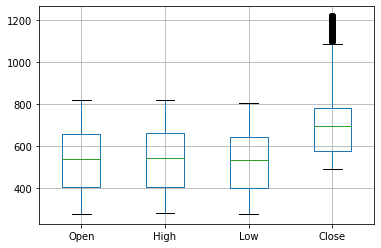

In [8]:
raw_dataset_train[['Open', 'High', 'Low', 'Close']].boxplot()

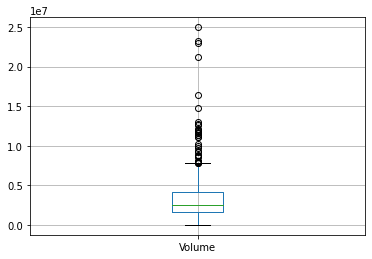

In [9]:
raw_dataset_train[['Volume']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa735e05790>,
      dtype=object)

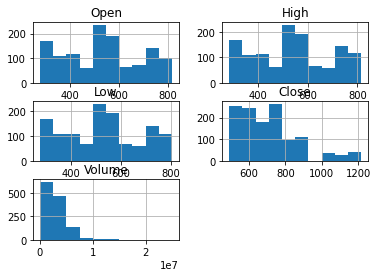

In [10]:
raw_dataset_train.hist()

In [11]:
# test data
raw_dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300
1,1/4/2017,788.36,791.34,783.16,786.90,1073000
2,1/5/2017,786.08,794.48,785.02,794.02,1335200
3,1/6/2017,795.26,807.90,792.20,806.15,1640200
4,1/9/2017,806.40,809.97,802.83,806.65,1272400
5,1/10/2017,807.86,809.13,803.51,804.79,1176800
6,1/11/2017,805.00,808.15,801.37,807.91,1065900
7,1/12/2017,807.14,807.39,799.17,806.36,1353100
8,1/13/2017,807.48,811.22,806.69,807.88,1099200
9,1/17/2017,807.08,807.14,800.37,804.61,1362100


In [12]:
# nan in test data
raw_dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB


In [13]:
raw_dataset_test.describe()

,Open,High,Low,Close,Volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,807.526000,811.926500,801.949500,807.904500,1.659895e+06
std,15.125428,14.381198,13.278607,13.210088,6.774747e+05
min,778.810000,789.630000,775.800000,786.140000,9.193000e+05
25%,802.965000,806.735000,797.427500,802.282500,1.248500e+06
50%,806.995000,808.640000,801.530000,806.110000,1.418050e+06
75%,809.560000,817.097500,804.477500,810.760000,1.743400e+06
max,837.810000,841.950000,827.010000,835.670000,3.246600e+06


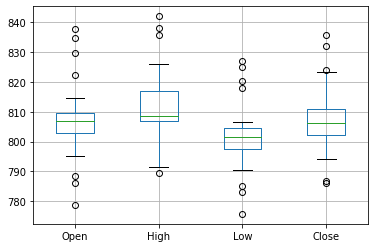

In [14]:
raw_dataset_test[['Open', 'High', 'Low', 'Close']].boxplot()

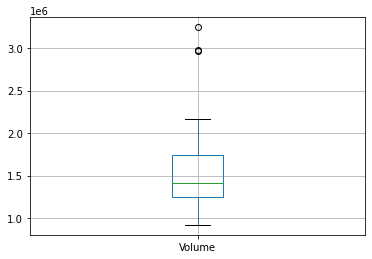

In [15]:
raw_dataset_test[['Volume']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa735e05d50>,
      dtype=object)

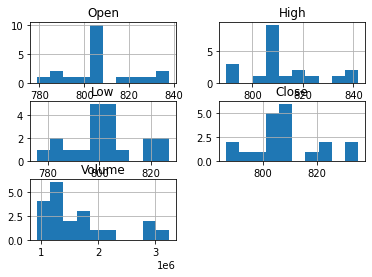

In [16]:
raw_dataset_test.hist()

# Prepare Data

In [17]:
dataset_train = raw_dataset_train.loc[:, ['Open']]
dataset_test = raw_dataset_test.loc[:, ['Open']]

In [18]:
# feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset_train)
dataset_train = scaler.transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [19]:
dataset_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [20]:
# preprate Time Series Data
# number of obserations to use from time
T = 60
def time_series_data(dataset):
  X = []
  y = []
  for i in range(T, len(dataset)):
    X.append(dataset[i-T:i, :])
    y.append(dataset[i,0])
  X = np.array(X)
  y = np.array(y)
  return X, y

In [21]:
X_train, y_train = time_series_data(dataset=dataset_train)
print(f"X_train shape ={X_train.shape} , y_train = {y_train.shape}")

X_train shape =(1198, 60, 1) , y_train = (1198,)


In [22]:
X_test, y_test = time_series_data(dataset=np.concatenate([dataset_train[-T:,: ], dataset_test], axis=0))
print(f"X_test shape ={X_test.shape} , y_test = {y_test.shape}")

X_test shape =(20, 60, 1) , y_test = (20,)


# Model

In [23]:
# input layer 
inputs = tf.keras.layers.Input(shape = (T, 1,))
# LSTM -1
x = tf.keras.layers.LSTM(units = 50, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(rate = 0.1)(x)
# LSTM -2
x = tf.keras.layers.LSTM(units = 50, return_sequences=True)(x)
x = tf.keras.layers.Dropout(rate = 0.1)(x)
# LSTM -3
x = tf.keras.layers.LSTM(units = 50, return_sequences=True)(x)
x = tf.keras.layers.Dropout(rate = 0.1)(x)
# LSTM -4
x = tf.keras.layers.LSTM(units = 50)(x)
x = tf.keras.layers.Dropout(rate = 0.1)(x)
# Dense
outputs = tf.keras.layers.Dense(units =1, activation ='relu')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0     

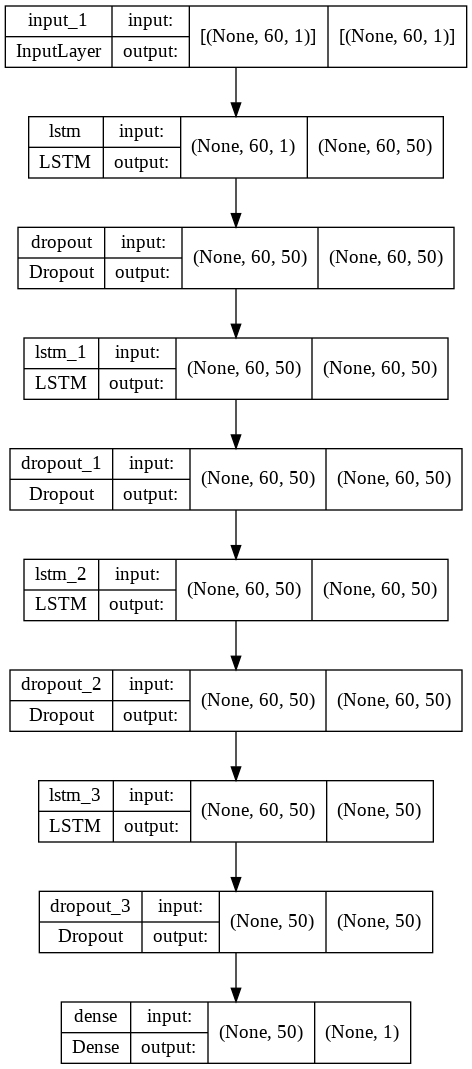

In [24]:
tf.keras.utils.plot_model(model = model, rankdir='TB', show_shapes = True)

# Train the Model

In [25]:
# compile
model.compile(optimizer ='adam', loss='mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [26]:
model.fit(x=X_train, y = y_train, epochs =100, batch_size =32)

Epoch 1/100
38/38 [==============================] - 13s 60ms/step - loss: 0.0260 - root_mean_squared_error: 0.1614
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 4/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.003

In [27]:
y_test_pred = model.predict(X_test)
y_test_pred 

array([[0.95308864],
       [0.94795287],
       [0.953043  ],
       [0.95556426],
       [0.96251994],
       [0.97494656],
       [0.981502  ],
       [0.97975487],
       [0.9793125 ],
       [0.9803734 ],
       [0.9815707 ],
       [0.98190093],
       [0.9821295 ],
       [0.98437774],
       [0.9864522 ],
       [1.000023  ],
       [1.0137011 ],
       [1.02509   ],
       [1.0255098 ],
       [1.0070608 ]], dtype=float32)

# Visualize Predictions

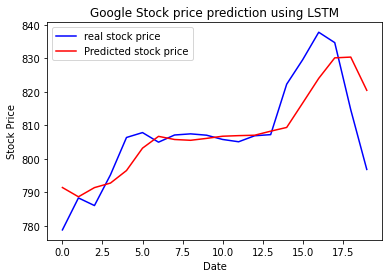

In [28]:
fig, axs = plt.subplots()
axs.plot(scaler.inverse_transform(y_test.reshape(1,-1)).squeeze(), label ='real stock price', color ='blue')
axs.plot(scaler.inverse_transform(y_test_pred).squeeze(), label ='Predicted stock price', color ='red')
axs.set_title('Google Stock price prediction using LSTM')
axs.set_xlabel('Date')
axs.set_ylabel('Stock Price')
axs.legend()